## Housing

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Preprocessing

In [8]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

결측치가 있는 데이터는 평균값으로 대체한다

In [10]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['ocean_proximity'] = lb.fit_transform(data['ocean_proximity'])

범주형 데이터는 `sklearn.preprocessing`의 `LabelEncoder`를 사용한다

In [44]:
data['median_house_value'] = np.log(data['median_house_value'])

In [45]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022764,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789684,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771671,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740517,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743151,3


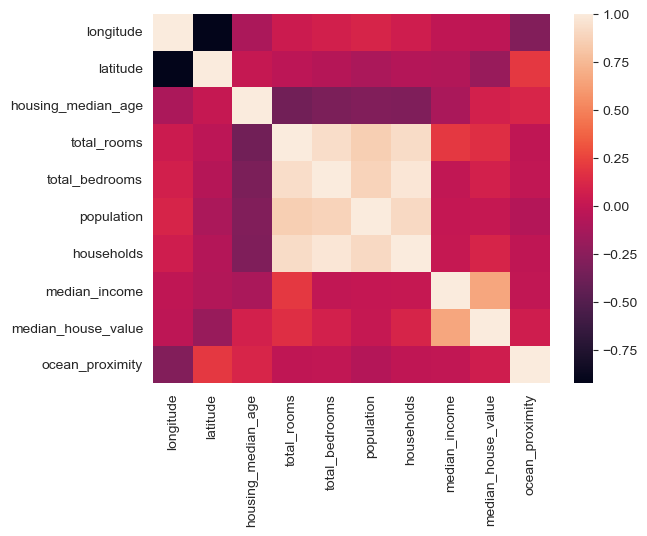

In [46]:
sns.heatmap(data.corr())
plt.show()

### Data Split

In [49]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 42
)

### Modeling

#### Ordinary Least Squares

In [84]:
import statsmodels.api as sm

ols = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2919.
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:41:44   Log-Likelihood:                -4868.7
No. Observations:               14448   AIC:                             9757.
Df Residuals:                   14438   BIC:                             9833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.4030      0.378    -32.798      0.000     -13.144     -11.662
longitude             -0.2822      0.004    -65.850      0.000      -0.291      -0.274
latitude              -0.2827      0.004    -71.322      0.000      -0.290      -0.275
housing_median_age     0.0035      0.000     13.931      0.000       0.003       0.004
total_rooms        -2.894e-05   4.65e-06     -6.228      0.000    -3.8e-05   -1.98e-05
total_bedrooms         0.0005   4.06e-05     12.317      0.000       0.000       0.001
population            -0.0002   6.17e-06    -28.134      0.000      -0.000      -0.000
households             0.0002   4.44e-05      4.988      0.000       0.000       0.000
median_income          0.1773      0.002     90.563      0.000       0.173       0.181
ocean_proximity       -0.0151      0.002     -7.009      0.000      -0.019      -0.011
==============================================================================
Omnibus:                      830.744   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3448.716
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                       5.387   Cond. No.                     5.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

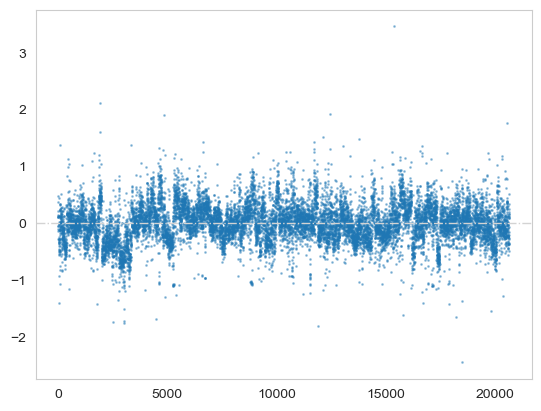

In [85]:
plt.axhline(0, ls = '-.', color = 'lightgray', lw = 1)
plt.scatter(
    ols.resid.index,
    ols.resid,
    marker = '.',
    alpha = 0.4,
    s = 4
)
plt.grid(False)
plt.show()

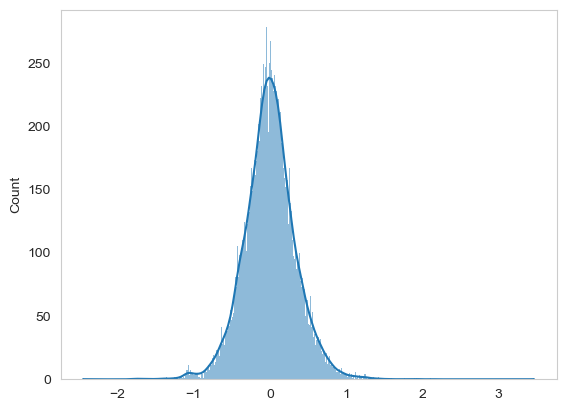

In [86]:
sns.histplot(
    ols.resid,
    bins = 500,
    kde = True,
    edgecolor = 'none'
)
plt.grid(False)
plt.show()

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
ols_pred = ols.predict(sm.add_constant(X_test))
print(f'Mean squared error : {mean_squared_error(y_test, ols_pred)}')

Mean squared error : 0.11791793356219045


In [95]:
from sklearn.metrics import mutual_info_score
from scipy.stats import kendalltau
ols_r2_score = r2_score(y_test, ols_pred)
ols_mi = mutual_info_score(y_test, ols_pred)
ols_kendal = kendalltau(y_test, ols_pred)[0]
print(f'R squared score : {ols_r2_score}')
print(f'Mutual information score : {ols_mi}')
print(f'Kendall tau score : {ols_kendal}')

R squared score : 0.6359984339845071
Mutual information score : 7.464857647624118
Kendall tau score : 0.6425860351895183


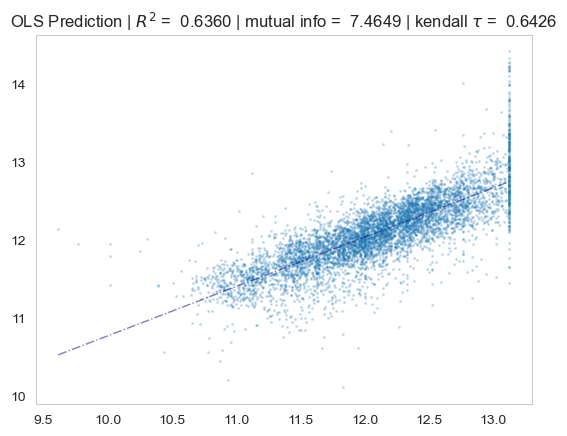

In [97]:
m, b = np.polyfit(y_test, ols_pred, 1)

plt.scatter(
    y_test,
    ols_pred,
    alpha = 0.2,
    s = 5,
    marker = '.'
)
plt.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    alpha = 0.5,
    color = 'navy',
    ls = '-.',
    lw = 1
)
plt.grid(False)
plt.title(rf'OLS Prediction | $R^2$ = {ols_r2_score : .4f} | mutual info = {ols_mi : .4f} | kendall $\tau$ = {ols_kendal : .4f}')
plt.show()

#### Ridge Regression

In [64]:
ridge = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit_regularized(
    method = 'elastic_net',
    alpha = 0.01,
    L1_wt = 0
)

In [67]:
ridge.params

array([-6.57739160e-02, -1.43487754e-01, -1.67958124e-01,  5.33272485e-03,
       -5.36962095e-05,  3.68101322e-04, -1.73790560e-04,  5.15519944e-04,
        1.94780353e-01,  5.10937401e-03])

In [71]:
ridge_pred = ridge.predict(sm.add_constant(X_test))
print(f'Mean squared error of Ridge : {mean_squared_error(y_test, ridge_pred)}')

Mean squared error of Ridge : 0.12572130245972096


In [99]:
ridge_r2_score = r2_score(y_test, ridge_pred)
ridge_mi = mutual_info_score(y_test, ridge_pred)
ridge_kendal = kendalltau(y_test, ridge_pred)[0]

print(f'R squared score : {ridge_r2_score}')
print(f'Mutual information score : {ridge_mi}')
print(f'Kendall tau score : {ridge_kendal}')

R squared score : 0.6119101684163215
Mutual information score : 7.464857647624118
Kendall tau score : 0.6305749543284146


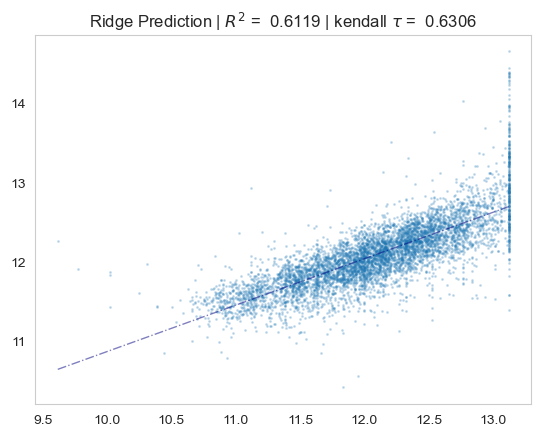

In [110]:
m, b = np.polyfit(y_test, ridge_pred, 1)

plt.scatter(
    y_test,
    ridge_pred,
    alpha = 0.2,
    s = 5,
    marker = '.'
)
plt.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    alpha = 0.5,
    color = 'navy',
    ls = '-.',
    lw = 1
)
plt.grid(False)
plt.title(rf'Ridge Prediction | $R^2$ = {ridge_r2_score : .4f} | kendall $\tau$ = {ridge_kendal : .4f}')
plt.show()

#### Lasso Regression

In [79]:
lasso = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit_regularized(
    method = 'elastic_net',
    alpha = 0.01,
    L1_wt = 1
)

print(lasso.params)

const                 10.579006
longitude             -0.004154
latitude              -0.006145
housing_median_age     0.009367
total_rooms           -0.000070
total_bedrooms         0.000400
population            -0.000151
households             0.000582
median_income          0.219360
ocean_proximity        0.000000
dtype: float64


In [80]:
lasso_pred = lasso.predict(sm.add_constant(X_test))
print(f'Mean squared error for Lasso : {mean_squared_error(y_test, lasso_pred)}')

Mean squared error for Lasso : 0.1576568742421431


In [101]:
lasso_r2_score = r2_score(y_test, lasso_pred)
lasso_mi = mutual_info_score(y_test, lasso_pred)
lasso_kendal = kendalltau(y_test, lasso_pred)[0]

print(f'R squared score for Lasso Regression : {lasso_r2_score}')
print(f'Mutual information score for Lasso Regression : {lasso_mi}')
print(f'Kendall tau score for Lasso Regression : {lasso_kendal}')

R squared score for Lasso Regression : 0.5133280631399347
Mutual information score for Lasso Regression : 7.464857647624118
Kendall tau score for Lasso Regression : 0.5696347506577562


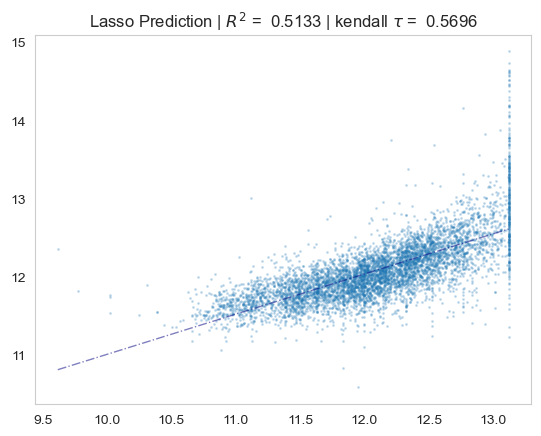

In [108]:
m, b = np.polyfit(y_test, lasso_pred, 1)

plt.scatter(
    y_test,
    lasso_pred,
    alpha = 0.2,
    s = 5,
    marker = '.'
)
plt.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    alpha = 0.5,
    color = 'navy',
    ls = '-.',
    lw = 1
)
plt.grid(False)
plt.title(rf'Lasso Prediction | $R^2$ = {lasso_r2_score : .4f} | kendall $\tau$ = {lasso_kendal : .4f}')
plt.show()

#### Elastic Net Regression

In [103]:
elastic = sm.OLS(
    y_train,
    sm.add_constant(X_train)
).fit_regularized(
    method = 'elastic_net',
    alpha = 0.01,
    L1_wt = 0.5
)

print(elastic.params)

const                 8.415278
longitude            -0.022376
latitude             -0.007348
housing_median_age    0.009609
total_rooms          -0.000073
total_bedrooms        0.000437
population           -0.000144
households            0.000551
median_income         0.222577
ocean_proximity       0.000000
dtype: float64


In [104]:
elastic_pred = elastic.predict(sm.add_constant(X_test))
print(f'Mean squared error for Elastic Net Regression : {mean_squared_error(y_test, elastic_pred) : .4f}')

Mean squared error for Elastic Net Regression :  0.1591


In [105]:
elastic_r2_score = r2_score(y_test, elastic_pred)
elastic_mi = mutual_info_score(y_test, elastic_pred)
elastic_kendal = kendalltau(y_test, elastic_pred)[0]
print(f'R squared score for Elastic Net Regression : {elastic_r2_score : .4f}')
print(f'Mutual information score for Elastic Net Regression : {elastic_mi : .4f}')
print(f'Kendall tau score for Elastic Net Regression : {elastic_kendal : .4f}')

R squared score for Elastic Net Regression :  0.5088
Mutual information score for Elastic Net Regression :  7.4649
Kendall tau score for Elastic Net Regression :  0.5646


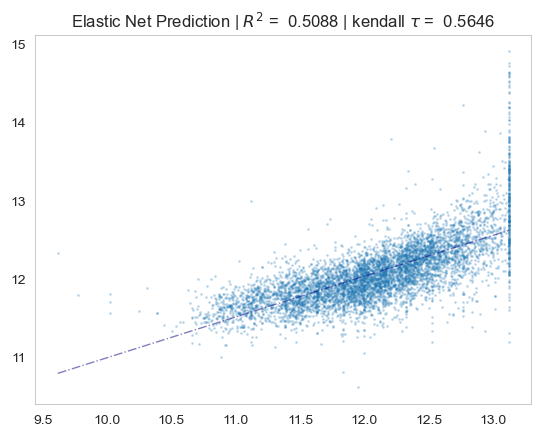

In [107]:
m, b = np.polyfit(y_test, elastic_pred, 1)

plt.scatter(
    y_test,
    elastic_pred,
    alpha = 0.2,
    s = 5,
    marker = '.'
)
plt.plot(
    np.sort(y_test), 
    m * np.sort(y_test) + b,
    alpha = 0.5,
    color = 'navy',
    ls = '-.',
    lw = 1
)
plt.grid(False)
plt.title(rf'Elastic Net Prediction | $R^2$ = {elastic_r2_score : .4f} | kendall $\tau$ = {elastic_kendal : .4f}')
plt.show()

#### K Neighbors Regresion